## Q1. In order to predict house price based on several characteristics, such as location, square footage, number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this situation would be the best to employ?

Answer:
The best metric in this case would be Root Mean Squared Error (RMSE).

Reason:

RMSE provides the error in the same units as the target variable (house price).

It directly reflects how far the predicted prices are from the actual prices.

Easier to interpret for business stakeholders than MSE.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None
               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000     

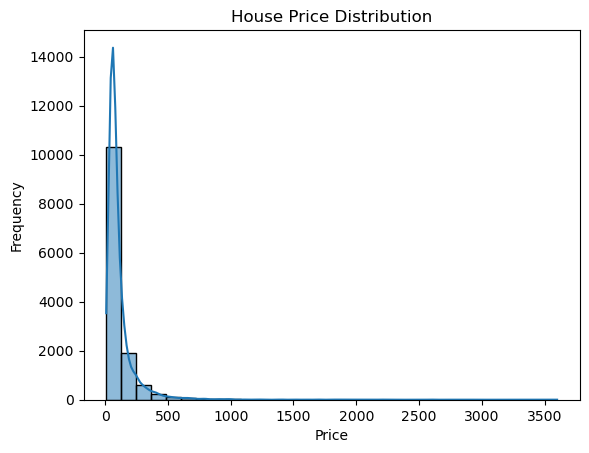

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:/Users/sumit/Downloads/Bengaluru_House_Data.csv")  # Update the filename if needed

# Display basic info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Plot distribution of house prices (Use lowercase column name)
sns.histplot(df["price"], bins=30, kde=True)
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


## Q2. You have built an SVM regression model and are trying to decide between using MSE or R-squared as your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price of a house as accurately as possible?

Answer:
Use Mean Squared Error (MSE) or better yet, Root Mean Squared Error (RMSE).

Reason:

MSE focuses on minimizing the actual prediction errors.

R-squared tells how much variance is explained, but not the actual magnitude of errors.

If the goal is accurate price prediction, RMSE or MSE is more relevant.

## Q3. You have a dataset with a significant number of outliers and are trying to select an appropriate regression metric to use with your SVM model. Which metric would be the most appropriate in this scenario?

Answer:
Use Mean Absolute Error (MAE).

Reason:

MAE is more robust to outliers than MSE or RMSE.

It gives equal weight to all errors (linear penalty), unlike MSE which squares errors and exaggerates the effect of outliers.

## Q4. You have built an SVM regression model using a polynomial kernel and are trying to select the best metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values are very close. Which metric should you choose to use in this case?

Answer:
Choose RMSE.

Reason:

RMSE is more interpretable since it's in the same units as the target variable (e.g., dollars).

Even if MSE and RMSE values are close, RMSE is easier to communicate to stakeholders.

## Q5. You are comparing the performance of different SVM regression models using different kernels (linear, polynomial, and RBF) and are trying to select the best evaluation metric. Which metric would be most appropriate if your goal is to measure how well the model explains the variance in the target variable?

Answer:
Use R-squared (R²) Score.

Reason:

R² measures the proportion of variance in the dependent variable explained by the model.

It is ideal for model comparison across different kernels.

📌 Mean Squared Error (MSE): 10842.08
📌 Root Mean Squared Error (RMSE): 104.13
📌 Mean Absolute Error (MAE): 36.22
📌 R² Score: 0.4908


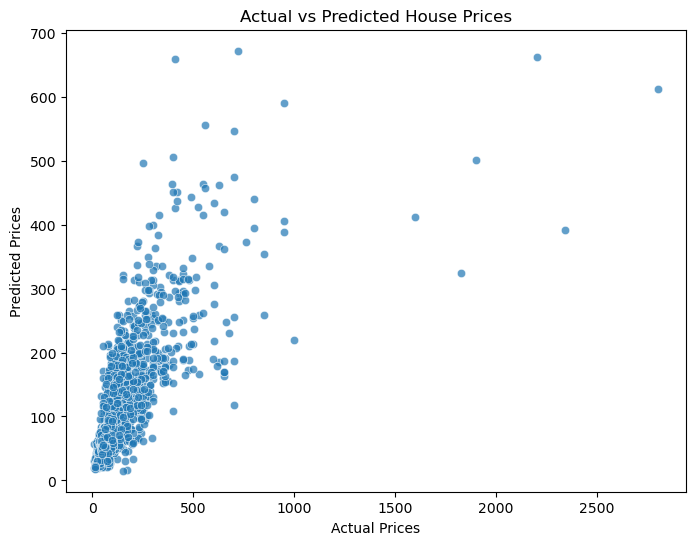

In [37]:
import numpy as np
import pandas as pd
import re  # For text processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 🔹 Load dataset
df = pd.read_csv("C:/Users/sumit/Downloads/Bengaluru_House_Data.csv")  

# 🔹 Function to extract numeric values safely
def extract_numeric(value):
    """Extracts the first numeric value from a string."""
    match = re.search(r"\d+\.?\d*", str(value))  # Find first number (integer or decimal)
    return float(match.group()) if match else np.nan  # Return as float if found, else NaN

# 🔹 Convert "size" column (e.g., "3 BHK" -> 3)
df["size"] = df["size"].apply(extract_numeric)

# 🔹 Convert "total_sqft" column
def process_sqft(value):
    """Handles sqft values with ranges and units."""
    if isinstance(value, str) and '-' in value:
        nums = [extract_numeric(v) for v in value.split('-')]
        return np.mean([n for n in nums if n is not None])  # Take average if range
    return extract_numeric(value)  # Convert single number directly

df["total_sqft"] = df["total_sqft"].apply(process_sqft)

# 🔹 Drop unnecessary categorical columns
df.drop(columns=["area_type", "availability", "society"], inplace=True, errors='ignore')

# 🔹 Fill missing values (Only for numeric columns)
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)

# 🔹 Encode 'location' (convert categorical to numeric)
df["location"] = df["location"].astype("category").cat.codes

# 🔹 Feature Selection (Assuming 'price' is the target variable)
X = df.drop(columns=["price"])  # Features
y = df["price"]  # Target

# 🔹 Split data into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Train an SVM Regression Model
svm_model = SVR(kernel="rbf", C=100, gamma=0.1)  # Hyperparameters can be tuned
svm_model.fit(X_train_scaled, y_train)

# 🔹 Predict on test set
y_pred = svm_model.predict(X_test_scaled)

# 🔹 Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 🔹 Print Evaluation Metrics
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 R² Score: {r2:.4f}")

# 🔹 Visualizing Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
